In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

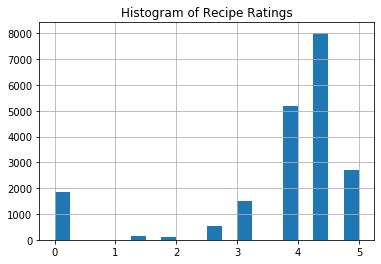

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

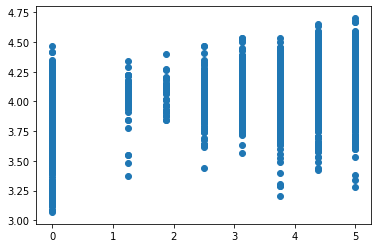

In [8]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinuous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [9]:
svr.score(X, Y)

-0.003978314483867651

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

In [3]:
raw_data = raw_data.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 235 to 13130
Columns: 675 entries, rating to turkey
dtypes: float64(675)
memory usage: 31.0 MB


In [19]:
raw_data.pineapple.describe()

count    6016.000000
mean        0.014794
std         0.120737
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pineapple, dtype: float64

While info() indicates that all values are floats, my instinct tells me that the rating column is the only column that should have float values, and everything else should essentially be dummy values as all of the variables I've checked have a max value of one, indicating the cell is one if the variable (text) is contained in the recipe. I'm going to attempt PCA on this data...

In [4]:
raw_data = raw_data.dropna()
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(raw_data)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00016625e+00 -3.61160717e-03  0.00000000e+00 ... -2.19375634e-02
   3.44738948e-03 -1.12917118e-05]
 [-3.61160717e-03  1.00016625e+00  0.00000000e+00 ... -6.65557395e-04
  -5.76293699e-04 -2.68922145e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-2.19375634e-02 -6.65557395e-04  0.00000000e+00 ...  1.00016625e+00
   8.66025248e-01 -5.38112786e-03]
 [ 3.44738948e-03 -5.76293699e-04  0.00000000e+00 ...  8.66025248e-01
   1.00016625e+00 -4.65941796e-03]
 [-1.12917118e-05 -2.68922145e-03  0.00000000e+00 ... -5.38112786e-03
  -4.65941796e-03  1.00016625e+00]]


In [69]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    (eig_val_cov / sum(eig_val_cov))
)

The percentage of total variance in the dataset explained by each component calculated by hand.
 [1.24611759e-02 1.03753477e-02 8.48226917e-03 6.27014076e-03
 5.73458114e-03 5.09072260e-03 4.82436736e-03 4.56570521e-03
 4.42355181e-03 4.33501867e-03 4.27304774e-03 4.22686217e-03
 4.12993602e-03 4.06588946e-03 3.97866308e-03 3.90598580e-03
 3.86825152e-03 3.77956145e-03 3.76055674e-03 3.74802669e-03
 3.71871781e-03 3.62583743e-03 3.65116338e-03 3.57132742e-03
 3.57786959e-03 3.52542472e-03 3.44595809e-03 3.43159230e-03
 3.40688049e-03 3.36709928e-03 3.33889762e-03 3.30771009e-03
 3.29705039e-03 3.28561544e-03 3.25789448e-03 3.22027283e-03
 3.21047542e-03 3.17406119e-03 3.16706926e-03 3.14815855e-03
 4.86633258e-05 3.12093328e-03 3.11364365e-03 3.10466435e-03
 6.21496762e-05 7.16786500e-05 6.71083811e-05 3.06865641e-03
 1.35160894e-04 3.03093374e-03 3.01631999e-03 2.99840688e-03
 2.99043780e-03 2.96378692e-03 1.80141913e-04 2.03907437e-04
 2.94038885e-03 2.92891163e-03 2.43249763e-18 2.3

In [5]:
corr_matrix = raw_data.corr()


Looking at the correlation matrix wasn't all that useful. There was only one variable (bon appetite) with a correlation greater than 0.1 and three less than -0.2. I'm going to try to print the correlation matrix for all values with high correlations (greater than 0.5 or less than -0.5).

In [6]:
raw_data['alcohol'] 
high_rating = corr_matrix[corr_matrix['rating'] > 0.1]
low_rating = corr_matrix[corr_matrix['rating'] < -0.2]
high_alcoholic = corr_matrix[corr_matrix['alcoholic'] > 0.5]

low

KeyError: 'alcohol'

In [7]:
not_rating_df = raw_data.drop(columns = ['rating'])
X = not_rating_df

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
not_rating_df['pca_1'] = sklearn_pca.fit_transform(X)
#Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)
#variables = sklearn_pca.explained_variance_ratio

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.0124475]


In [8]:
not_rating_df.corr()

,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,pca_1
#cakeweek,1.000000,NaN,-0.000576,-0.000815,-0.000407,-0.001154,NaN,-0.000235,-0.003845,-0.003239,...,-0.003091,NaN,-0.000470,-0.002090,NaN,NaN,-0.000665,-0.000576,-0.002689,-0.014700
#wasteless,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22-minute meals,-0.000576,NaN,1.000000,-0.001413,0.235173,-0.002000,NaN,-0.000407,-0.006661,-0.005612,...,-0.005355,NaN,-0.000815,-0.003621,NaN,NaN,-0.001153,-0.000998,-0.004659,0.009955
3-ingredient recipes,-0.000815,NaN,-0.001413,1.000000,-0.000999,-0.002829,NaN,-0.000576,-0.009425,-0.007941,...,0.015035,NaN,-0.001153,-0.005124,NaN,NaN,-0.001631,-0.001413,-0.006592,0.028604
30 days of groceries,-0.000407,NaN,0.235173,-0.000999,1.000000,-0.001414,NaN,-0.000288,-0.004709,-0.003967,...,-0.003786,NaN,-0.000576,-0.002560,NaN,NaN,-0.000815,-0.000706,-0.003293,-0.001300
advance prep required,-0.001154,NaN,-0.002000,-0.002829,-0.001414,1.000000,NaN,-0.000816,-0.000278,0.004073,...,-0.010727,NaN,-0.001632,-0.007253,NaN,NaN,-0.002309,-0.002000,-0.009331,-0.042789
alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alaska,-0.000235,NaN,-0.000407,-0.000576,-0.000288,-0.000816,NaN,1.000000,-0.002718,-0.002290,...,-0.002185,NaN,-0.000333,-0.001478,NaN,NaN,-0.000471,-0.000407,-0.001901,0.010900
alcoholic,-0.003845,NaN,-0.006661,-0.009425,-0.004709,-0.000278,NaN,-0.002718,1.000000,-0.032664,...,-0.035732,NaN,-0.005438,-0.024162,NaN,NaN,-0.007693,-0.006661,-0.031083,0.422622
almond,-0.003239,NaN,-0.005612,-0.007941,-0.003967,0.004073,NaN,-0.002290,-0.032664,1.000000,...,-0.018388,NaN,-0.004582,-0.003291,NaN,NaN,-0.006482,-0.005612,-0.019500,-0.095262


In [9]:
raw_data['pca_1'] = not_rating_df['pca_1']

In [ ]:
print(rfr.feature_importances_)

In [10]:
raw_data = pd.concat([raw_data, pd.get_dummies(raw_data['rating'])], axis=1)
raw_data[-7:]

,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,...,turkey,pca_1,0.0,1.25,1.875,2.5,3.125,3.75,4.375,5.0
8041,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.548440,0,0,0,0,0,0,1,0
14486,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.303860,0,0,0,0,0,0,1,0
15578,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.484019,0,0,0,0,0,1,0,0
3314,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-3.711707,0,0,0,0,0,1,0,0
17437,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-3.155674,0,0,0,0,0,1,0,0
6696,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.063183,0,0,0,0,0,0,0,1
13130,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.869315,0,0,0,0,0,1,0,0


In [11]:
#raw_data = raw_data[~raw_data.index.duplicated()]
#raw_dating = raw_data[raw_data['rating'] > 2.5]
raw_data['rating_2'] = raw_data['rating'].map(lambda x:1 if x > 2.5 else 0)

In [12]:
from sklearn.svm import SVC
svc = SVC()
Z = raw_data.sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating_2.sample(frac=0.3, replace=True, random_state=1)
svc.fit(Z,Y)

C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

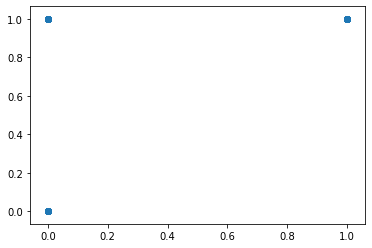

In [13]:
plt.scatter(Y, svc.predict(Z))

In [14]:
svc.score(Z,Y)

0.9767313019390582

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, Z, Y, cv=5)

C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

array([0.96132597, 0.97783934, 0.97783934, 0.97783934, 0.97777778])